In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import pandas as pd

db = mysql.connector.connect(
    host="localhost",
    user="Soon Woo",
    passwd="root",
    database="testdatabase"
)

In [68]:
#Accessing database from MySQL Workshop
dbquery1 = pd.read_sql_query("SELECT Student, Race, `Homework Final Score` AS `Homework Score`, `Midterms Final Score` AS `Midterms Score`, `Final Exam Final Score` AS `Final Exam Score`, `Final Score` FROM fall2020_class1;",db)
dbquery2 = pd.read_sql_query("SELECT Student, Race, `Homework Final Score` AS `Homework Score`, `Midterms Final Score` AS `Midterms Score`, `Final Exam Final Score` AS `Final Exam Score`, `Final Score` FROM fall2020_class2;",db)
dbquery3 = pd.read_sql_query("SELECT Student, Race, `Homework Final Score` AS `Homework Score`, `Midterms Final Score` AS `Midterms Score`, `Final Exam Final Score` AS `Final Exam Score`, `Final Score` FROM spring2021_class1;",db)
dbquery4 = pd.read_sql_query("SELECT Student, Race, `Homework Final Score` AS `Homework Score`, `Midterms Final Score` AS `Midterms Score`, `Final Exam Final Score` AS `Final Exam Score`, `Final Score` FROM spring2021_class2;",db)
dbquery5 = pd.read_sql_query("SELECT Student, Race, `Homework Final Score` AS `Homework Score`, `Midterms Final Score` AS `Midterms Score`, `Final Exam Final Score` AS `Final Exam Score`, `Final Score` FROM spring2022_class1;",db)

C:\Users\Soon Woo\AppData\Roaming\Python\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\Soon Woo\AppData\Roaming\Python\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\Soon Woo\AppData\Roaming\Python\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\Soon Woo\AppData\Roaming\Python\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pan

In [69]:
#Converting database into dataframe for Python operations
df1 = pd.DataFrame(dbquery1, columns=['Student', 'Race', 'Homework Score', 'Midterms Score', 'Final Exam Score', 'Final Score']).assign(Class ="f2020 #1")
df2 = pd.DataFrame(dbquery2, columns=['Student', 'Race', 'Homework Score', 'Midterms Score', 'Final Exam Score', 'Final Score']).assign(Class ="f2020 #2")
df3 = pd.DataFrame(dbquery3, columns=['Student', 'Race', 'Homework Score', 'Midterms Score', 'Final Exam Score', 'Final Score']).assign(Class ="s2021 #1")
df4 = pd.DataFrame(dbquery4, columns=['Student', 'Race', 'Homework Score', 'Midterms Score', 'Final Exam Score', 'Final Score']).assign(Class ="s2021 #2")
df5 = pd.DataFrame(dbquery5, columns=['Student', 'Race', 'Homework Score', 'Midterms Score', 'Final Exam Score', 'Final Score']).assign(Class ="s2022 #1")
combinedDF = [df1, df2, df3, df4, df5]
df = pd.concat(combinedDF)

In [70]:
#Converting final scores into letter grades according to grading rubric
numGrade = df["Final Score"].values.tolist()
letterGrade = []
for i in numGrade:
    if i >= 93:
        letterGrade.append("A")
    elif i >=90:
        letterGrade.append("A-")
    elif i >=87:
        letterGrade.append("B+")
    elif i >=83:
        letterGrade.append("B")
    elif i >=80:
        letterGrade.append("B-")
    elif i >=77:
        letterGrade.append("C+")
    elif i >=73:
        letterGrade.append("C")
    elif i >=70:
        letterGrade.append("C-")
    elif i >=67:
        letterGrade.append("D+")
    elif i >=63:
        letterGrade.append("D")
    elif i >=60:
        letterGrade.append("D-")
    else:
        letterGrade.append("F")
df['Final Grade'] = letterGrade
df

,Student,Race,Homework Score,Midterms Score,Final Exam Score,Final Score,Class,Final Grade
0,"Alston, Sakurako",asian,88.75,76.50,48.57,77.09,f2020 #1,C+
1,"Arevalo, Leah",asian,95.42,81.25,45.71,79.89,f2020 #1,C+
2,"Armerding, Emily",caucasian,96.25,85.25,54.29,82.65,f2020 #1,B-
3,"Aycock, Colleen",caucasian,100.83,97.75,68.57,91.01,f2020 #1,A-
4,"Benavides-Torrice, Zurisadai",hispanic/latinx,97.50,87.25,65.71,86.35,f2020 #1,B
...,...,...,...,...,...,...,...,...
21,"Sahagun, Bryana",caucasian,87.78,82.34,82.00,83.36,s2022 #1,B
22,"Serrano, Jessica",hispanic/latinx,31.67,91.72,92.00,71.82,s2022 #1,C-
23,"Sharpless, Emma",caucasian,93.89,96.25,86.00,95.18,s2022 #1,A
24,"Smith, Sarah",caucasian,98.33,99.06,88.00,97.49,s2022 #1,A


Text(0.5, 0, 'Final Grades')

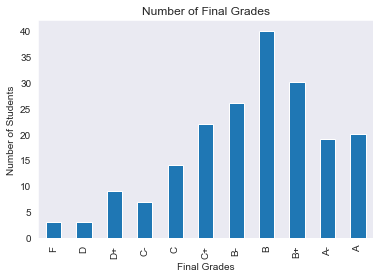

In [71]:
#Bar Chart // Analyzing the final grades over 5 classes
barC = df.groupby('Final Grade', as_index=False).size()
#Setting up custom category type to order letter grades (A+ > A > A- > B+ > ...)
gradeOrder = pd.CategoricalDtype(['F', 'D-', 'D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A'], ordered=True)
barC['Final Grade'] = barC['Final Grade'].astype(gradeOrder)
barC = barC.sort_values('Final Grade').set_index('Final Grade').plot.bar(legend=False,grid=False)
plt.title("Number of Final Grades")
plt.ylabel("Number of Students")
plt.xlabel("Final Grades")

Text(0.5, 0, 'Classes')

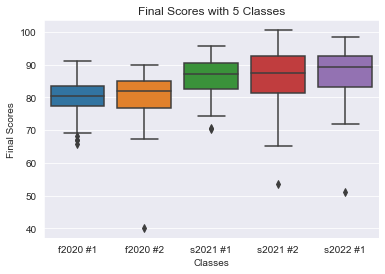

In [72]:
#Box Chart for the Final Scores for all 5 classes
sns.boxplot(x="Class", y="Final Score", data=df)
plt.title("Final Scores with 5 Classes")
plt.ylabel("Final Scores")
plt.xlabel("Classes")

In [73]:
#Comparing Final Grades with the ethnicity of students \\ Equity Dimension
equBar = pd.DataFrame(df, columns=['Race', 'Final Grade'])
equBar = equBar.groupby(['Race', 'Final Grade']).size()
equBar = equBar.unstack('Race').fillna(0)
pd.options.display.precision = 2
equBar['asian'] = equBar['asian'].div(equBar['asian'].sum())
equBar['black'] = equBar['black'].div(equBar['black'].sum())
equBar['caucasian'] = equBar['caucasian'].div(equBar['caucasian'].sum())
equBar['hispanic/latinx'] = equBar['hispanic/latinx'].div(equBar['hispanic/latinx'].sum())
equBar = equBar.reset_index(level=0)
equBar['Final Grade'] = equBar['Final Grade'].astype(gradeOrder)
equBar = equBar.sort_values('Final Grade').set_index('Final Grade')
equBar = equBar.multiply(100)
equBar

Race,asian,black,caucasian,hispanic/latinx
Final Grade,,,,
F,0.0,25.0,2.20,0.00
D,0.0,0.0,3.30,0.00
D+,4.0,0.0,2.20,8.22
C-,4.0,0.0,2.20,5.48
C,4.0,0.0,8.79,6.85
C+,16.0,25.0,6.59,15.07
B-,16.0,0.0,14.29,12.33
B,20.0,0.0,26.37,15.07
B+,12.0,25.0,12.09,20.55


Text(0.5, 0, 'Final Grades')

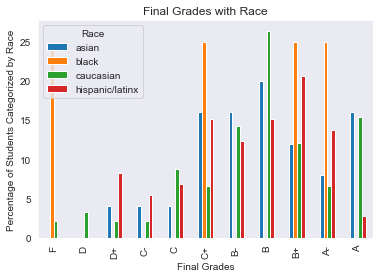

In [74]:
#Bar Chart comparing Final Grades with Race
equBar.plot.bar(grid=False)
plt.title("Final Grades with Race")
plt.ylabel("Percentage of Students Categorized by Race")
plt.xlabel("Final Grades")

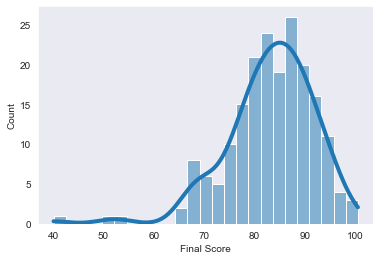

In [75]:
#Histogram with Kernel Distribution Estimation
sns.set_style("darkgrid", {'axes.grid' : False})
hisC = df['Final Score']
hisC = sns.histplot(hisC, kde=True, bins=25, line_kws=dict(linewidth=4))

Text(0.5, 1.0, 'Homework Score vs Midterms Score')

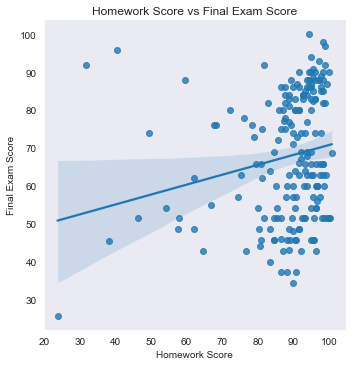

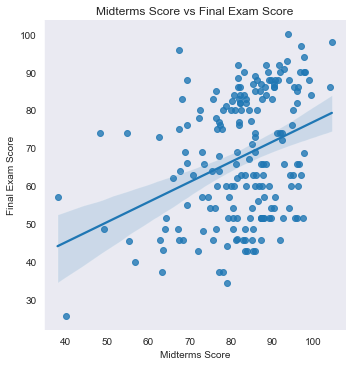

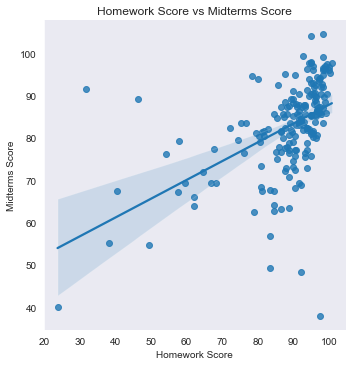

In [76]:
#Comparing correlations between Homework, Midterm, and Final Scores using Scatter Plots while overlaying Regression Line
scaPlot = pd.DataFrame(df, columns=['Student', 'Homework Score', 'Midterms Score', 'Final Exam Score'])
sns.lmplot(x='Homework Score', y= 'Final Exam Score', data=scaPlot, fit_reg=True,ci=95)
plt.title("Homework Score vs Final Exam Score")
sns.lmplot(x='Midterms Score', y= 'Final Exam Score', data=scaPlot, fit_reg=True,ci=95)
plt.title("Midterms Score vs Final Exam Score")
sns.lmplot(x='Homework Score', y= 'Midterms Score', data=scaPlot, fit_reg=True,ci=95)
plt.title("Homework Score vs Midterms Score")